In [3]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore") # Ignore warnings for cleaner output

In [4]:
# Load the dataset
data=pd.read_csv('salary.csv')

In [5]:
#summary of data in each column
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [6]:
#check missing values per column
data.isnull().sum()


AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [7]:
#display all statistical numerical data per column
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [9]:
#display all  statistical data per inluding categorical column
data.describe(include="O")

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


In [10]:
data.duplicated().sum()

0

In [12]:
top_salaries = data.nlargest(5, 'ANNUAL')
low_salaries = data.nsmallest(5, 'ANNUAL')
print("Top 5 Highest Salaries:",)
display(top_salaries)
print("Top 5 Lowest Salaries:")
display(low_salaries)

Top 5 Highest Salaries:


,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
83851,542,CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...,WILLSON,JAMES,,C542,CHIEF SCIENTIFIC OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,...,0.0,40.0,46125.00,553500.00,372291,NaN,NaN,NaN,NaN,NaN
14793,323,TEACHER RETIREMENT SYSTEM ...,AUBY,JASE,R,C204,CHIEF INVESTMENT OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,...,0.0,40.0,37500.00,450000.00,121522,NaN,NaN,NaN,NaN,NaN
144232,327,EMPLOYEES RETIREMENT SYSTEM ...,TULL,CHARLES,T,D136,DIRECTOR OF INVESTMENTS ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,37500.00,450000.00,24680,NaN,NaN,NaN,NaN,NaN
15154,323,TEACHER RETIREMENT SYSTEM ...,LANG,ERIC,L,U105,SENIOR MANAGING DIRECTOR ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,...,0.0,40.0,32666.66,391999.92,124553,NaN,NaN,NaN,NaN,NaN
136727,701,TEXAS EDUCATION AGENCY ...,TIMMINS III,BARNEY,H,701I,PSF CHIEF INVESTMENT OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,...,0.0,40.0,32031.25,384375.00,7792,NaN,NaN,NaN,NaN,NaN


Top 5 Lowest Salaries:


,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
142067,102,HOUSE OF REPRESENTATIVES ...,HOUSTON,DONTE,D,7110,ELECTED OFFICIALS STAFF ...,BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,50.00,600.00,851628,NaN,NaN,NaN,NaN,NaN
141394,101,SENATE ...,EDMONDSON,DOUGLAS,,7103,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,...,20.0,1.0,86.66,1039.92,176291,NaN,NaN,NaN,NaN,NaN
141415,101,SENATE ...,FONTENOT,RACHEAL,D,7103,LEG. SERVICE/MAINTENANCE ...,OTHER,FEMALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,...,20.0,1.0,86.66,1039.92,1246122,NaN,NaN,NaN,NaN,NaN
141808,102,HOUSE OF REPRESENTATIVES ...,BERNAL,JESUS,R,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,10.0,100.00,1200.00,118315,NaN,NaN,NaN,NaN,NaN
141897,102,HOUSE OF REPRESENTATIVES ...,CRUZ JR,PHILLIP,,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,0.0,20.0,100.00,1200.00,338420,NaN,NaN,NaN,NaN,NaN


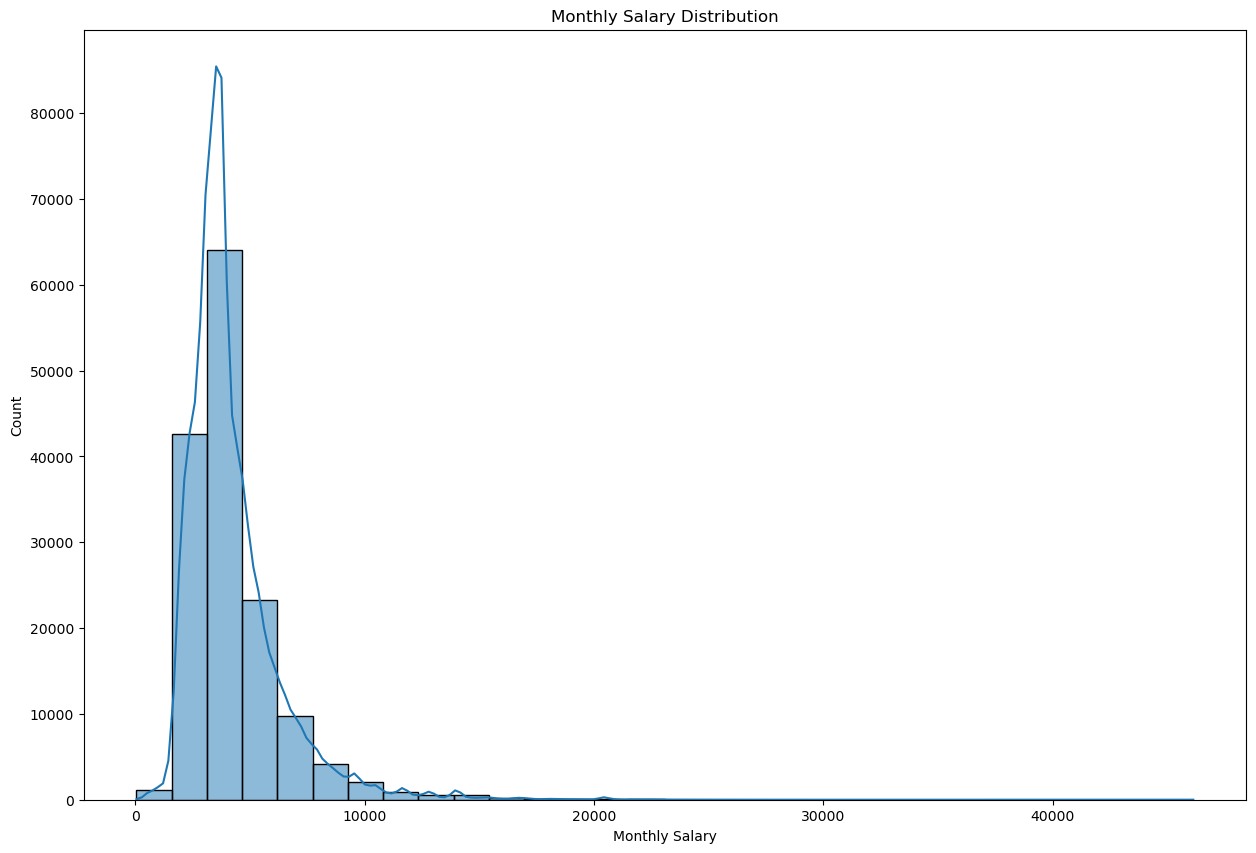

In [16]:
#visualize monthly salary distribution
plt.figure(figsize=(15, 10))
sns.histplot(data['MONTHLY'], bins=30, kde=True)
plt.title('Monthly Salary Distribution')
plt.xlabel('Monthly Salary')
plt.ylabel('Count')
plt.show()

In [19]:
# Mean of annual salary per agency
mean_salary_per_agency = data.groupby('AGENCY NAME')['ANNUAL'].mean()
print("\nMean Annual Salary per Agency Name:")
display(mean_salary_per_agency)


Mean Annual Salary per Agency Name:


AGENCY NAME
ALCOHOLIC BEVERAGE COMMISSION                          60756.823364
BOARD OF ARCHITECTURAL EXAMINERS                       78834.536842
BOARD OF CHIROPRACTIC EXAMINERS                        63249.048000
BOARD OF DENTAL EXAMINERS                              53149.654286
BOARD OF EXAMINERS OF PSYCHOLOGISTS                    46863.136000
                                                          ...      
THIRD COURT OF APPEALS DISTRICT                        95583.048750
THIRTEENTH COURT OF APPEALS DISTRICT                   99880.260000
TREASURY SAFEKEEPING TRUST COMPANY                    117943.637746
TWELFTH COURT OF APPEALS DISTRICT                     108816.656000
WATER DEVELOPMENT BOARD                                71959.442471
Name: ANNUAL, Length: 113, dtype: float64

In [21]:
# Compare Mean of annual salary per gender
mean_salary_per_agency = data.groupby('GENDER')['ANNUAL'].mean()
print("\nMean Annual Salary per Gender:")
display(mean_salary_per_agency)


Mean Annual Salary per Gender:


GENDER
FEMALE             47898.965053
MALE               54458.685961
Name: ANNUAL, dtype: float64

In [22]:
# Mean of annual salary per Ethnic Group
mean_salary_per_ethnicity = data.groupby('ETHNICITY')['ANNUAL'].mean()
print("\nMean Annual Salary per Ethnic Group:")
display(mean_salary_per_ethnicity)


Mean Annual Salary per Ethnic Group:


ETHNICITY
AM INDIAN          51416.548820
ASIAN              63711.042118
BLACK              43244.728227
HISPANIC           47210.593195
OTHER              45544.809772
WHITE              56057.932803
Name: ANNUAL, dtype: float64

In [23]:
#  Ethnic Group count in all agencies
Ethnicity = data.groupby('ETHNICITY')['AGENCY'].count()
print("\nEthnic Groups count:",Ethnicity)



Ethnic Groups count: ETHNICITY
AM INDIAN            712
ASIAN               4268
BLACK              35853
HISPANIC           40585
OTHER                921
WHITE              67142
Name: AGENCY, dtype: int64


In [24]:
#  Show  different employment status count
Status = data.groupby('STATUS')['ANNUAL'].count()
print("Employment Group type count:",Status)

Employment Group type count: STATUS
CRF - CLASSIFIED REGULAR FULL-TIME          142502
CRP - CLASSIFIED REGULAR PART-TIME            1531
CTF - CLASSIFIED TEMPORARY FULL-TIME          1096
CTP - CLASSIFIED TEMPORARY FULL-TIME             1
CTP - CLASSIFIED TEMPORARY PART-TIME            81
ERF - EXEMPT REGULAR FULL-TIME                 923
ERP - EXEMPT REGULAR PART-TIME                   1
URF - UNCLASSIFIED REGULAR FULL-TIME          2363
URP - UNCLASSIFIED REGULAR PART-TIME           950
UTF - UNCLASSIFIED TEMPORARY FULL-TIME          12
UTP - UNCLASSIFIED TEMPORARY PART-TIME          21
Name: ANNUAL, dtype: int64


In [30]:
print("Task 1 Key Insights:")

print("1. Statistical distribution of numerical and categorical variables.")
print("2. Possible correlations between mean annual salary and variables like ethnicity, agency name,gender.")
print("3. Identification of highest and lowest salaries.")
print("3. Identification of top paying agencies.")
print("4. Employment status count")

Task 1 Key Insights:
1. Statistical distribution of numerical and categorical variables.
2. Possible correlations between mean annual salary and variables like ethnicity, agency name,gender.
3. Identification of highest and lowest salaries.
3. Identification of top paying agencies.
4. Employment status count


In [33]:
#Task 2:-Create a predictive model which will help the Texas state government 
#team to know the payroll information of employees of the state of Texas.  

In [35]:
#import basic libraries for the model creation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [36]:
# Perform basic Checks
# missing values
data.isnull().sum()


AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [37]:
data.info() # informationa about type of data per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [41]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [43]:
data.tail()


,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,...,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [45]:
data.shape

(149481, 21)

In [47]:
#Perform EDA on the data 

In [ ]:
data.describe()

In [ ]:
#display all  statistical data per inluding categorical column
data.describe(include="O")

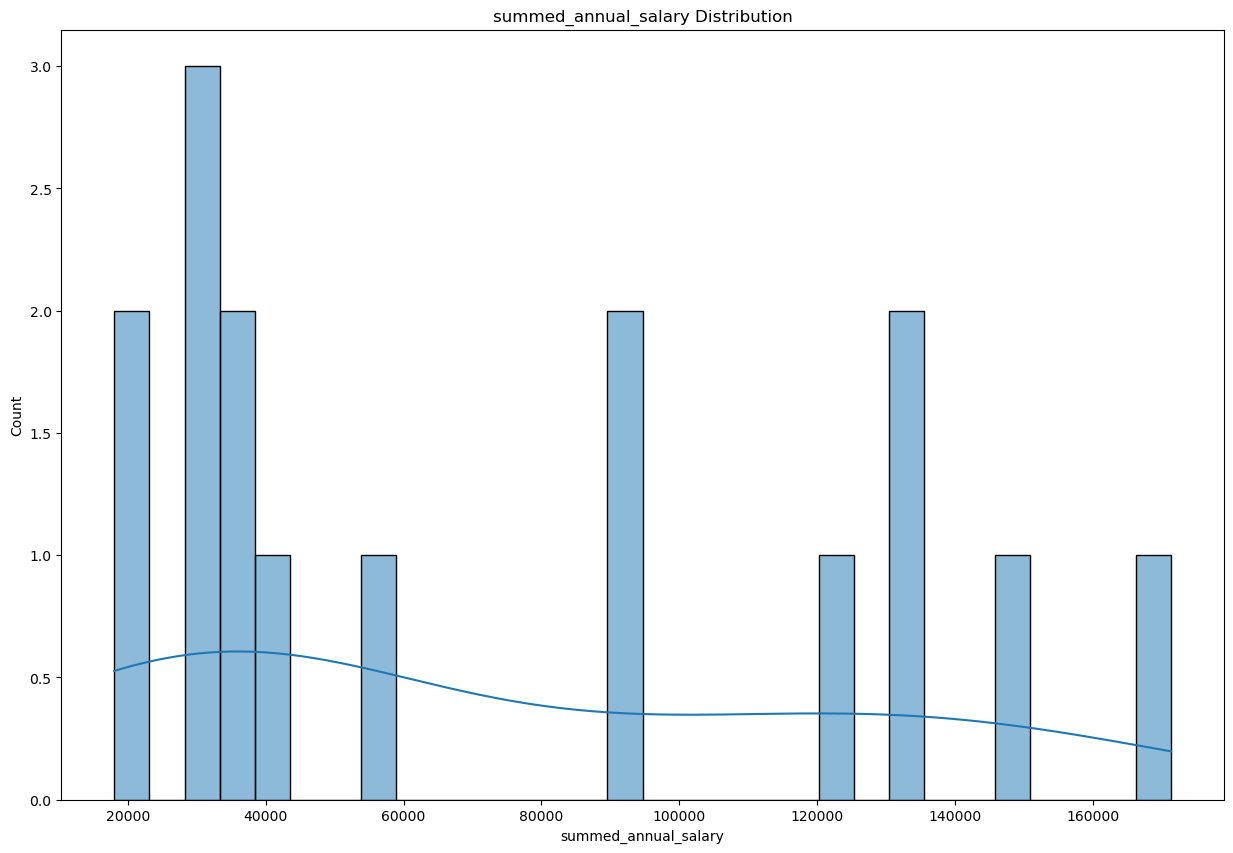

In [53]:
#visualize summed_annual_salary distribution
plt.figure(figsize=(15, 10))
sns.histplot(data['summed_annual_salary'], bins=30, kde=True)
plt.title('summed_annual_salary Distribution')
plt.xlabel('summed_annual_salary')
plt.ylabel('Count')
plt.show()

In [55]:
# Perform data cleaning/Preprocessing

In [57]:
# Check for missing values
data.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

<Axes: xlabel='ANNUAL'>

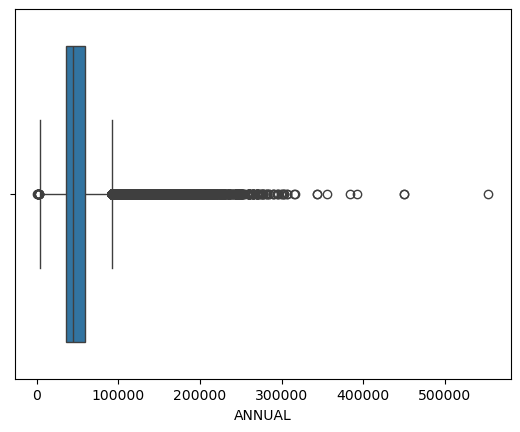

In [59]:
#Checking the outliers
sns.boxplot(x='ANNUAL',data=data)

<Axes: xlabel='HRS PER WK'>

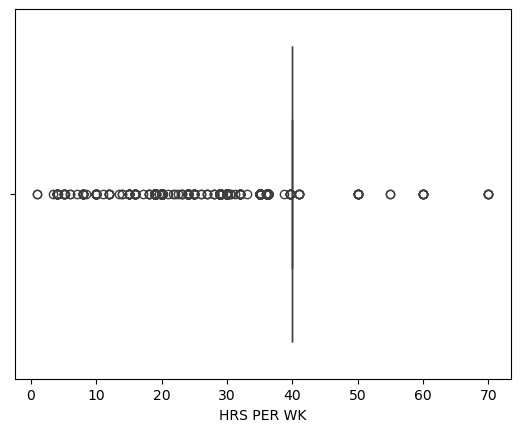

In [61]:
sns.boxplot(x='HRS PER WK',data=data)

In [63]:
# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [64]:
# Replace null values in 'ANNUAL' column with mode
annual_mode = data['ANNUAL'].mode()[0]
data['ANNUAL'].fillna(annual_mode, inplace=True)


In [67]:
# Feature selection

In [69]:
# Drop rows with missing salary values
data = data.dropna(subset=['ANNUAL'])


In [105]:
data.drop('multiple_full_time_jobs',axis=1,inplace=True)

In [107]:
data.drop('summed_annual_salary',axis=1,inplace=True)

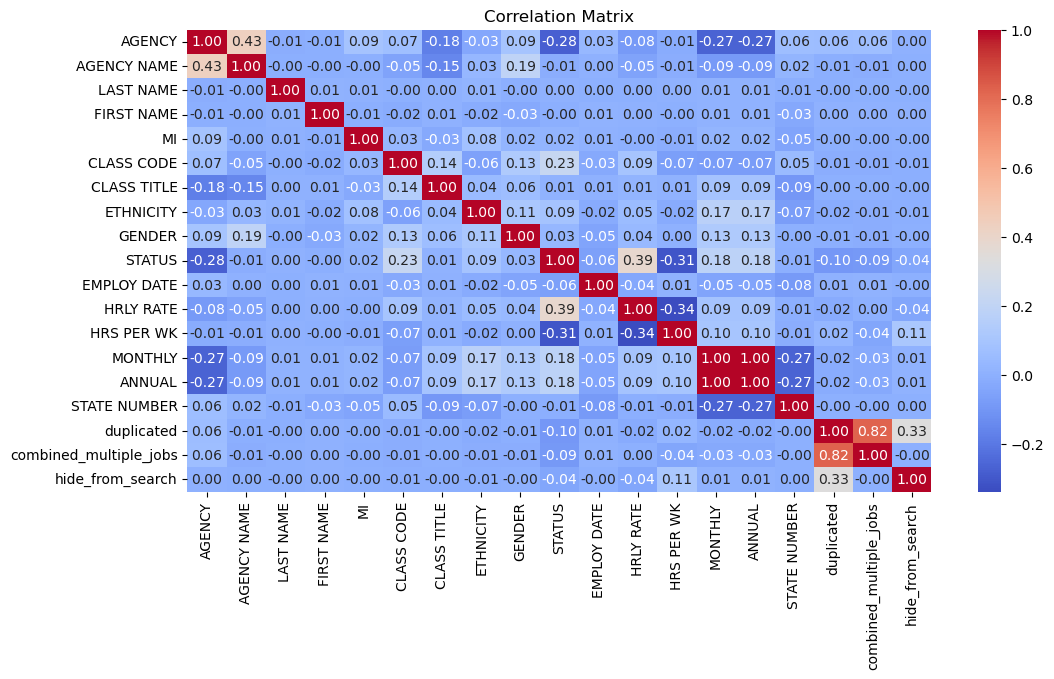

In [109]:
# Check correlation between column variables
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [110]:
#check correlation
data.corr

<bound method DataFrame.corr of         AGENCY  AGENCY NAME  LAST NAME  FIRST NAME  MI  CLASS CODE  \
0          241           17      30461       15274  22        1409   
1          212           48      30461       15274  22         616   
2          241           17      33197       10053  10        1409   
3          212           48      33197       10053  10         616   
4          696           88      26462        6953   0         810   
...        ...          ...        ...         ...  ..         ...   
149476     809           76      37355       10053  16        1042   
149477     809           76      37780        7024   1          84   
149478     809           76      38068        5571   3           4   
149479     809           76      38313        6089  18         278   
149480     809           76      38652        7720  16           4   

        CLASS TITLE  ETHNICITY  GENDER  STATUS  EMPLOY DATE  HRLY RATE  \
0               711          5       1       8       

In [113]:
# Model creation

In [115]:
# Define features and target variable
X = data.drop(columns=['ANNUAL'])
y = data['ANNUAL']


In [117]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Standardize numerical features
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
X_train.shape

(119584, 18)

In [123]:
X_test.shape

(29897, 18)

In [125]:
y = data['ANNUAL']

In [127]:
# Train Linear Regression model
lr_model=LinearRegression() # object creation
lr_model.fit(X_train,y_train) # training of linear regression

LinearRegression()

In [129]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [130]:
# Predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [131]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"R2 Score: {r2_score(y_true, y_pred)}\n")



In [132]:
evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, rf_predictions, "Random Forest Regressor")

Linear Regression Performance:
MAE: 3.353631283027702e-11
MSE: 2.3724107985479967e-21
RMSE: 4.870739983357762e-11
R2 Score: 1.0

Random Forest Regressor Performance:
MAE: 10.056290855137552
MSE: 844140.0599507615
RMSE: 918.770950754736
R2 Score: 0.9986857578110995



In [133]:
# To try another model and fine tune the above models

In [169]:
# import additional libraries for the new model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import xgboost as xgb


NameError: name 'y_pred' is not defined

In [135]:
# Replace null values in 'ANNUAL' column with mode
annual_mode = data['ANNUAL'].mode()
data['ANNUAL'].fillna(annual_mode, inplace=True)

In [136]:
# Remove outliers using Z-score threshold of 3
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data = data[(z_scores < 3).all(axis=1)]

In [137]:
# Encode categorical variables using One-Hot Encoding, ensuring no full column drop
categorical_cols = data.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    encoder = OneHotEncoder(handle_unknown='ignore', drop=None, sparse_output=False)
    categorical_data = encoder.fit_transform(data[categorical_cols])
    categorical_df = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_cols))
    
    # Drop original categorical columns and concatenate encoded data
    data = data.drop(columns=categorical_cols)
    data = pd.concat([data, categorical_df], axis=1)

In [138]:
 # Define features and target variable
X = data.drop(columns=['ANNUAL'])
y = data['ANNUAL']


In [139]:
if X.empty:
    raise ValueError("Feature matrix X is empty after preprocessing. Check for dropped categorical columns or data cleaning issues.")


In [140]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [142]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [143]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
rf_best_model = grid_search.best_estimator_

In [144]:
# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [145]:
# Predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_best_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

In [146]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"R2 Score: {r2_score(y_true, y_pred)}\n")

In [147]:
evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, rf_predictions, "Random Forest Regressor (Tuned)")
evaluate_model(y_test, xgb_predictions, "XGBoost Regressor")

Linear Regression Performance:
MAE: 2.5134142977439378e-11
MSE: 9.715286068151909e-22
RMSE: 3.116935364769682e-11
R2 Score: 1.0

Random Forest Regressor (Tuned) Performance:
MAE: 0.6348507714436472
MSE: 6.011947622720128
RMSE: 2.4519273281890164
R2 Score: 0.9999999829777312

XGBoost Regressor Performance:
MAE: 96.61870255866837
MSE: 59572.5660800162
RMSE: 244.07491899008429
R2 Score: 0.9998313258372604

